In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
df=pd.read_csv('Cereals.csv')

In [182]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541


In [183]:
for i in df.columns[3:]:
    df[i]=df[i].replace(-1,df[i].mean())
    
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [184]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,96.148892,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,66.688658,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [185]:
for i in df.columns[3:]:
   Q1 = df[i].quantile(0.25)
   Q3 = df[i].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   outlier=(df[i]<lower_bound) | (df[i]>upper_bound)
   df.loc[outlier,i]=df[i].median()

df
    

C:\Users\SWAPNIL BHATTACHARYA\AppData\Local\Temp\ipykernel_25332\2220115166.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outlier,i]=df[i].median()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3.0,5,15,2.00,8.0,8.0,135.000000,25,3,1.0,1.00,33.983679
1,All-Bran,K,C,110,4.0,1,260,1.75,7.0,5.0,90.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,110,4.0,0,140,1.75,8.0,0.0,90.000000,25,3,1.0,0.50,40.253086
3,Almond_Delight,R,C,110,2.0,2,200,1.00,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2,180,1.50,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2.0,1,250,0.00,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1.0,1,140,0.00,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3.0,1,230,3.00,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3.0,1,200,3.00,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [186]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.0,76.000000,76.000000
mean,107.236842,2.401316,1.013158,181.381579,1.792105,14.930575,7.038608,85.754155,25.0,2.197368,1.0,0.817632,41.623743
std,8.099166,0.875670,1.013159,60.186370,1.520220,3.737575,4.377048,48.049515,0.0,0.832982,0.0,0.213478,12.464724
min,90.000000,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,25.0,1.000000,1.0,0.250000,18.042851
25%,100.000000,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.0,1.000000,1.0,0.670000,32.932466
50%,110.000000,2.250000,1.000000,180.000000,1.625000,14.861842,7.000000,90.000000,25.0,2.000000,1.0,0.750000,40.179526
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.0,3.000000,1.0,1.000000,50.031833
max,120.000000,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,25.0,3.000000,1.0,1.330000,74.472949


In [187]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3.0,5,15,2.00,8.0,8.0,135.000000,25,3,1.0,1.00,33.983679
1,All-Bran,K,C,110,4.0,1,260,1.75,7.0,5.0,90.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,110,4.0,0,140,1.75,8.0,0.0,90.000000,25,3,1.0,0.50,40.253086
3,Almond_Delight,R,C,110,2.0,2,200,1.00,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2,180,1.50,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2.0,1,250,0.00,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1.0,1,140,0.00,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3.0,1,230,3.00,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3.0,1,200,3.00,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [188]:
df["mfr"].value_counts().count()

np.int64(7)

In [189]:
# unique manufacturers is 7

In [190]:
df["mfr"].value_counts()  #number of cereals listed per manufacturer

mfr
K    23
G    22
P     9
R     8
Q     8
N     5
A     1
Name: count, dtype: int64

In [191]:
df["type"].value_counts() #number of cold and hot cereals

type
C    73
H     3
Name: count, dtype: int64

In [192]:
df[df["rating"]==df["rating"].max()]
# highest rated cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
63,Shredded_Wheat_'n'Bran,N,C,90,3.0,0,180,4.0,19.0,0.0,140.0,25,1,1.0,0.67,74.472949


In [193]:
df[df["rating"]==df["rating"].min()]

#print("lowest rated cereal")

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
9,Cap'n'Crunch,Q,C,120,1.0,2,220,0.0,12.0,12.0,35.0,25,2,1.0,0.75,18.042851


In [194]:
hotncold_avg=df.groupby("type")["rating"].mean()
print(hotncold_avg)

print("Hot is more preffered")

type
C    41.002621
H    56.737708
Name: rating, dtype: float64
Hot is more preffered


In [195]:
df[df["fiber"]==df["fiber"].max()]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
51,Post_Nat._Raisin_Bran,P,C,120,3.0,1,200,6.0,11.0,14.0,90.0,25,3,1.0,0.67,37.840594


In [196]:
df[df["protein"]>3]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,All-Bran,K,C,110,4.0,1,260,1.75,7.0,5.0,90.0,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,110,4.0,0,140,1.75,8.0,0.0,90.0,25,3,1.0,0.50,40.253086
40,Life,Q,C,100,4.0,2,150,2.00,12.0,6.0,95.0,25,2,1.0,0.67,45.328074
42,Maypo,A,H,100,4.0,1,180,0.00,16.0,3.0,95.0,25,2,1.0,1.00,54.850917
43,"Muesli_Raisins,_Dates,_&amp;_Almonds",R,C,110,4.0,3,95,3.00,16.0,11.0,170.0,25,3,1.0,1.00,37.136863
44,"Muesli_Raisins,_Peaches,_&amp;_Pecans",R,C,110,4.0,3,150,3.00,16.0,11.0,170.0,25,3,1.0,1.00,34.139765
55,Quaker_Oat_Squares,Q,C,100,4.0,1,135,2.00,14.0,6.0,110.0,25,3,1.0,0.50,49.511874


In [197]:
df[["name","shelf"]]

,name,shelf
0,100%_Natural_Bran,3
1,All-Bran,3
2,All-Bran_with_Extra_Fiber,3
3,Almond_Delight,3
4,Apple_Cinnamon_Cheerios,1
...,...,...
71,Triples,3
72,Trix,2
73,Wheat_Chex,1
74,Wheaties,1


Text(0.5, 1.0, 'Bar graph of Shelf Counts by Name')

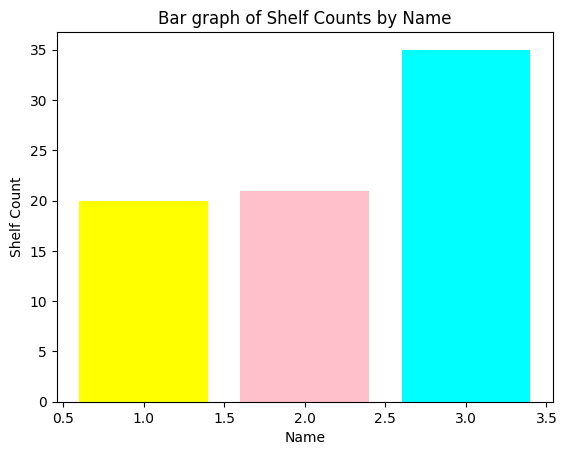

In [198]:
#bar graph

shelf_counts=df["shelf"].value_counts()

plt.bar(shelf_counts.index,shelf_counts,color=["cyan","pink","yellow"])
plt.xlabel("Name")
plt.ylabel("Shelf Count")
plt.title("Bar graph of Shelf Counts by Name")

<Axes: xlabel='mfr', ylabel='sugars'>

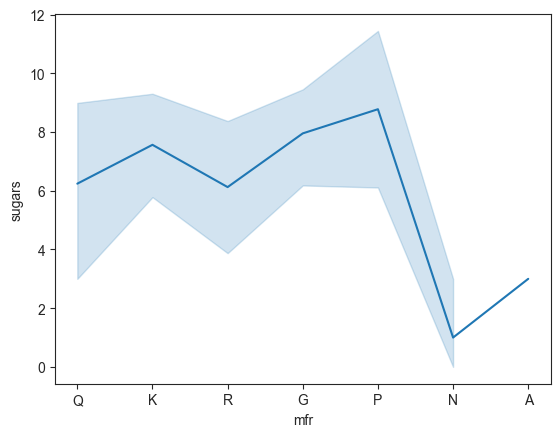

In [220]:
sns.set_style("ticks")
sns.set_context="talk"
sns.lineplot(data=df, x="mfr",y="sugars")

<Axes: xlabel='mfr', ylabel='calories'>

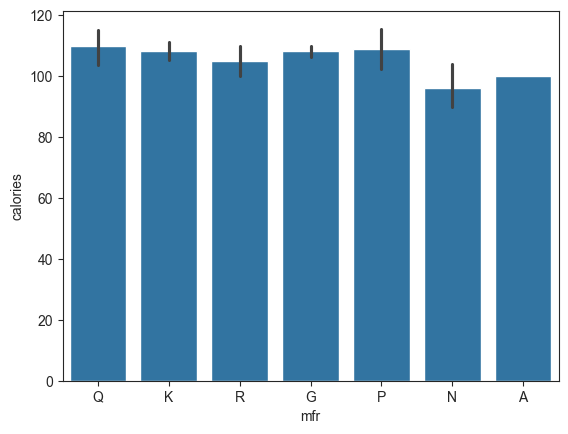

In [222]:
sns.barplot(data=df,x="mfr",y="calories", estimator= np.mean)

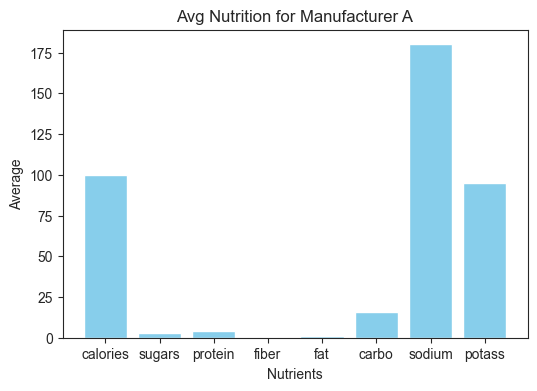

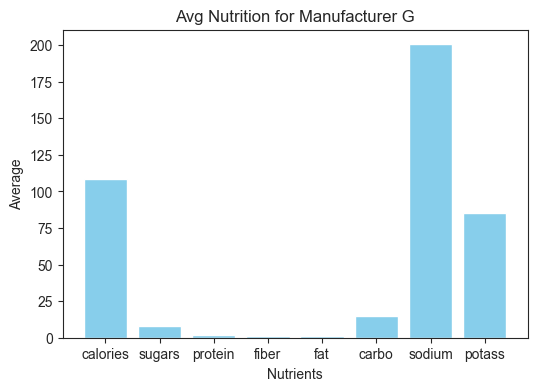

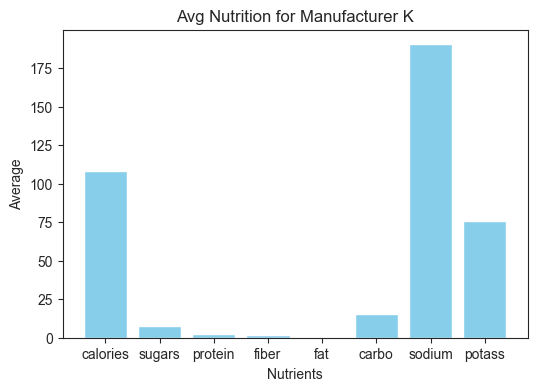

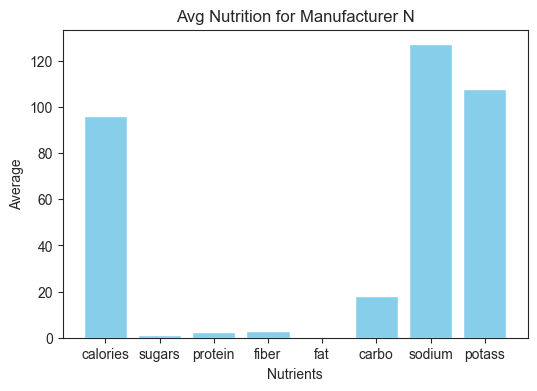

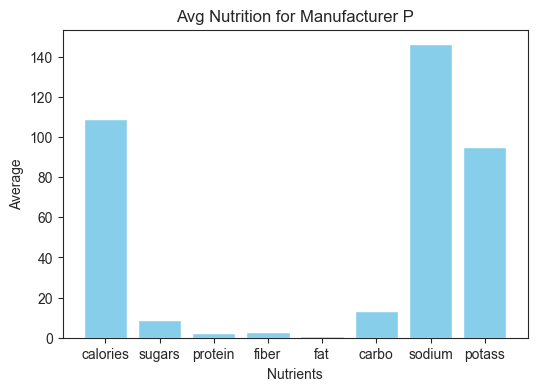

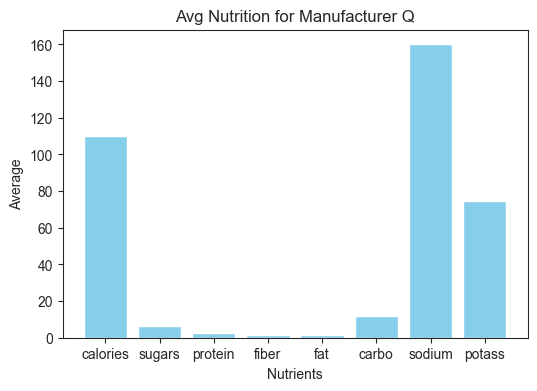

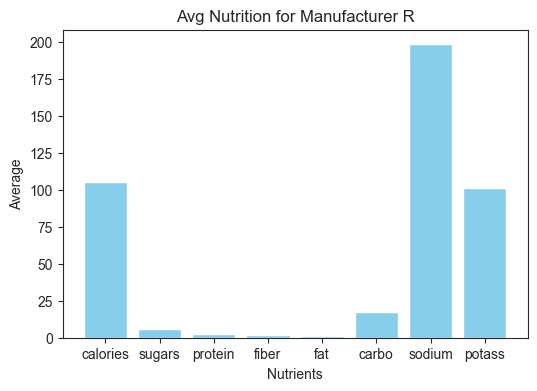

In [247]:
avg_by_mfr = df.groupby('mfr')[['calories', 'sugars', 'protein', 'fiber', 'fat', 'carbo', 'sodium', 'potass']].mean()
avg= pd.DataFrame(avg_by_mfr)

nutrients = avg.columns
mfrs = avg.index

for i in avg.index:
    plt.figure(figsize=(6,4))
    plt.bar(avg.columns,avg.loc[i], color='skyblue')
    plt.title("Avg Nutrition for Manufacturer " + str(i))
    plt.xlabel("Nutrients")
    plt.ylabel("Average")

<Axes: xlabel='sugars', ylabel='calories'>

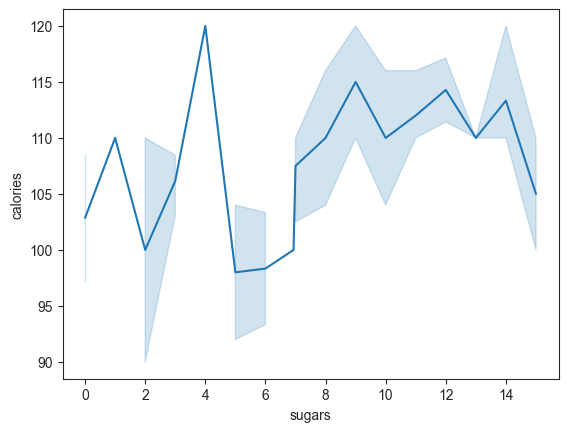

In [232]:
sns.lineplot(data=df, x=df["sugars"],y=df["calories"])

<Axes: xlabel='rating', ylabel='sugars'>

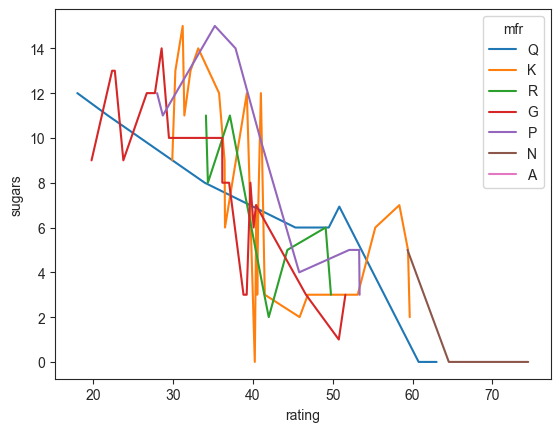

In [249]:
sort_rating=df.sort_values("rating")
sns.lineplot(data=df, x=sort_rating["rating"],y="sugars",hue="mfr")

<Axes: xlabel='fiber', ylabel='rating'>

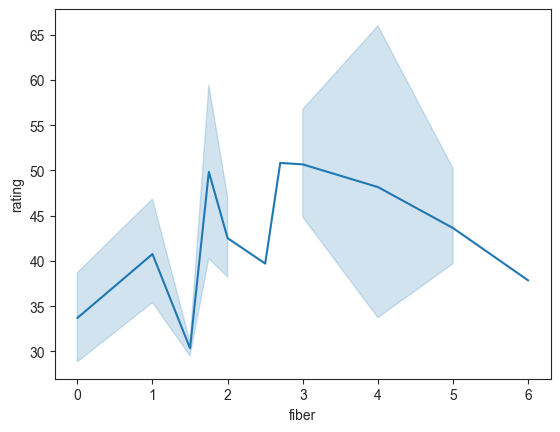

In [256]:
sort_rating=df.sort_values("rating")
sns.lineplot(data=df, y=sort_rating["rating"],x="fiber")

<Axes: xlabel='shelf', ylabel='rating'>

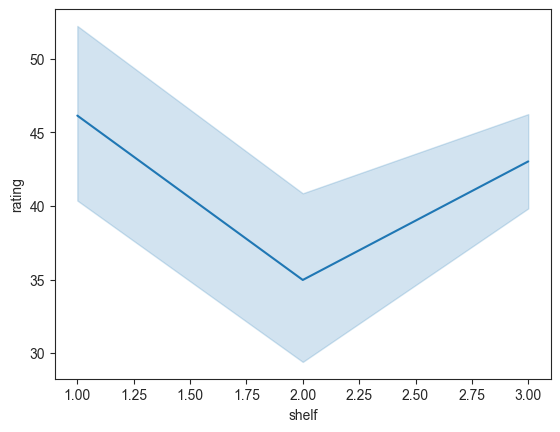

In [251]:
sns.lineplot(data=df, x="shelf", y="rating")